In [2]:
import sys
sys.path.append('/content/drive/MyDrive/PFITRE/')


In [ ]:
import matplotlib.pyplot as plt

from utils import *
from PFITRE_Net import PFITRE_net

import numpy as np
import pandas as pd
import tifffile as tf
%matplotlib inline

# use pretrained network for post processing

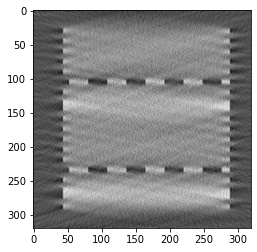

In [3]:
Model = PFITRE_net()

## where model weight is saved
model_weights_path = './mdl_weight/ckpt_PFITRE.pth'

## load weight for pretrained network 
Model = NN_load(Model, model_weights_path)

## load one slice image for image testing
img_input = tf.imread("./img_test/img_test1.tiff")

plt.imshow(img_input, cmap='gray')

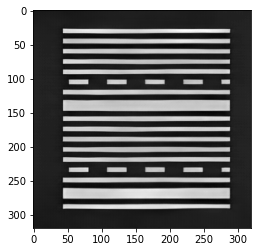

In [4]:
## 1. rescale based on absolute max and min value in a image

model_output = NN_PostCorrect(img_input, Model, norm="self")

plt.imshow(model_output, cmap='gray')

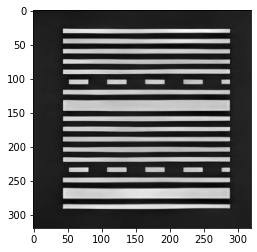

In [14]:
## 2. rescale based on percentile value in a image

## sort pixel intensity and define "max" or "min" value as percentile of real max and min
## e.g. norm_quant = 0.01, the "max" is 99%, and min is 1%, This is used for avoid hot pixel problem
norm_quant = 0.01

model_output = NN_PostCorrect(img_input, Model, norm="self_quant", norm_quant = 0.01)

plt.imshow(model_output, cmap='gray')

# Iterative correction with PFITRE on 2D image

100%|██████████| 8/8 [00:09<00:00,  1.15s/it]


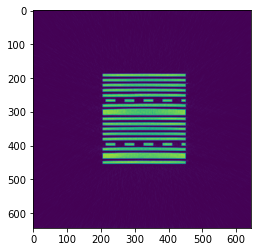

In [6]:
Model = PFITRE_net()

## where model weight is saved
model_weights_path = './mdl_weight/ckpt_PFITRE.pth'

## load weight for pretrained network
Model = NN_load(Model, model_weights_path)

#################

sinogram = tf.imread("./img_test/sino_test1.tiff")
angle_list = np.array(pd.read_csv("./img_test/sino_test1_angle.csv")['Angle'])
theta = np.array(angle_list/180*np.pi)

recon, x_list = recon_ADMM_NN_TV(sinogram, theta, Model, iter_num=8, ADMM_rho_const=25, cor_shift=0, padding=True, initial=None, mask_boundary=False, mask_ratio=0.95, norm_quant=False, TV=True)

plt.imshow(recon)

# Iterative correction with PFITRE on 3D image stack

In [13]:
## 3D recon

sinogram_stack = tf.imread("./img_test/sino_test2.tiff")
angle_list = np.array(pd.read_csv("./img_test/sino_test2_angle.csv")['Angle'])
theta = np.array(angle_list/180*np.pi)

#####################
## load weight for pretrained network
Model = PFITRE_net()

## where model weight is saved
model_weights_path = './mdl_weight/ckpt_PFITRE.pth'
Model = NN_load(Model, model_weights_path)
#################################

recon_3d =[]
for i in range(sinogram_stack.shape[1]):

    sinogram = sinogram_stack[:,i,:]  

    recon, x_list = recon_ADMM_NN_TV(sinogram, theta, Model, iter_num=8, ADMM_rho_const=25, cor_shift=0.5, padding=True, initial=None, mask_boundary=False, mask_ratio=0.95, norm_quant=False, TV=True)
    recon_3d.append(recon)
    
recon_3dy = np.float32(np.array(recon_3d))
tf.imsave('./img_test/sino_test2_recon.tiff', recon_3dy)


100%|██████████| 8/8 [00:01<00:00,  6.42it/s]
